In [90]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import PoissonRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import hdbscan

from matplotlib import pyplot as plt
import seaborn as sns

# Data Exploration and Processing

### Sheet 1 - Player Data

In [2]:
df_first_sheet = pd.read_excel("datasets/players-and-matches.xlsx", sheet_name=0)

In [3]:
df_first_sheet.head()

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,year
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,...,66,66,66,68,63,53,53,53,63,FIFA 20
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,...,61,61,61,65,61,54,54,54,61,FIFA 19
2,158023,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,...,61,61,61,63,59,48,48,48,59,FIFA 19
3,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,32,1985-02-05,185,80,Portugal,Real Madrid,Spain Primera Division,...,62,62,62,66,61,53,53,53,61,FIFA 18
4,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,31,1985-02-05,185,80,Portugal,Real Madrid,Spain Primera Division,...,61,61,61,65,61,53,53,53,61,FIFA 17


In [4]:
df_first_sheet.loc[0]["goalkeeping_diving"]

6

In [5]:
df_first_sheet.shape

(122841, 101)

In [6]:
df_first_sheet.describe()

,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,122841.000000,122841.000000,122841.000000,122841.000000,121272.000000,122841.000000,122841.000000,1.228410e+05,122841.000000,122841.000000,...,122841.000000,122841.000000,122841.000000,122841.000000,122841.000000,122841.000000,122841.000000,122841.000000,122841.000000,122841.000000
mean,208516.528749,25.102441,181.191793,75.295593,1.378282,65.695753,70.671014,2.045513e+06,11235.054664,1.112560,...,53.898658,53.508544,53.508544,53.508544,53.898658,53.219145,52.292158,52.292158,52.292158,53.219145
std,34908.678726,4.644967,6.714110,6.985100,0.751320,7.093064,6.298466,4.885185e+06,22478.888064,0.389652,...,13.423319,13.568023,13.568023,13.568023,13.423319,13.734891,14.628024,14.628024,14.628024,13.734891
min,2.000000,16.000000,154.000000,49.000000,0.000000,40.000000,40.000000,0.000000e+00,0.000000,1.000000,...,14.000000,15.000000,15.000000,15.000000,14.000000,14.000000,15.000000,15.000000,15.000000,14.000000
25%,193013.000000,21.000000,176.000000,70.000000,1.000000,61.000000,66.000000,2.500000e+05,2000.000000,1.000000,...,48.000000,46.000000,46.000000,46.000000,48.000000,46.000000,41.000000,41.000000,41.000000,46.000000
50%,214330.000000,25.000000,181.000000,75.000000,1.000000,66.000000,70.000000,6.000000e+05,4000.000000,1.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,54.000000,54.000000,54.000000,56.000000
75%,231465.000000,28.000000,186.000000,80.000000,2.000000,70.000000,75.000000,1.600000e+06,10000.000000,1.000000,...,63.000000,64.000000,64.000000,64.000000,63.000000,63.000000,64.000000,64.000000,64.000000,63.000000
max,258970.000000,53.000000,208.000000,110.000000,4.000000,94.000000,95.000000,1.230000e+08,575000.000000,5.000000,...,88.000000,87.000000,87.000000,87.000000,88.000000,86.000000,89.000000,89.000000,89.000000,86.000000


In [7]:
len(list(set(df_first_sheet["sofifa_id"])))

41533

### Sheet 2 -  data dict player data

In [8]:
df_second_sheet = pd.read_excel("datasets/players-and-matches.xlsx", sheet_name=1)

In [9]:
print(df_second_sheet.shape)
df_second_sheet.head()

(101, 3)


,column,class,description
0,sofifa_id,numeric,Unique player ID
1,short_name,character,Short player name
2,long_name,character,Long player name
3,age,numeric,NaN
4,dob,Date,NaN


In [10]:
df_second_sheet.to_csv("players_data_dict.csv")

### Sheet 3 - Match Data

In [11]:
df_third_sheet = pd.read_excel("datasets/players-and-matches.xlsx", sheet_name=2)

In [12]:
print(df_third_sheet.shape)
df_third_sheet.head()

(2390, 23)


,league,date,home_team,away_team,fthg,ftag,ftr,hthg,htag,htr,...,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,English Premier League,2015-08-08 00:00:00,Bournemouth,Aston Villa,0,1,A,0,0,D,...,2,3,13,13,6,3,3,4,0,0
1,English Premier League,2015-08-08 00:00:00,Chelsea,Swansea City,2,2,D,2,1,H,...,3,10,15,16,4,8,1,3,1,0
2,English Premier League,2015-08-08 00:00:00,Everton,Watford,2,2,D,0,1,A,...,5,5,7,13,8,2,1,2,0,0
3,English Premier League,2015-08-08 00:00:00,Leicester City,Sunderland,4,2,H,3,0,H,...,8,5,13,17,6,3,2,4,0,0
4,English Premier League,2015-08-08 00:00:00,Manchester United,Tottenham Hotspur,1,0,H,1,0,H,...,1,4,12,12,1,2,2,3,0,0


In [13]:
set(df_third_sheet["home_team"])

{'AFC Richmond',
 'Arsenal',
 'Aston Villa',
 'Bournemouth',
 'Brentford',
 'Brighton & Hove Albion',
 'Burnley',
 'Cardiff City',
 'Chelsea',
 'Everton',
 'Fulham',
 'Huddersfield Town',
 'Hull City',
 'Leeds United',
 'Leicester City',
 'Liverpool',
 'Manchester City',
 'Manchester United',
 'Middlesbrough',
 'Newcastle United',
 'Norwich City',
 'Sheffield United',
 'Southampton',
 'Stoke City',
 'Sunderland',
 'Swansea City',
 'Tottenham Hotspur',
 'Watford',
 'West Bromwich Albion',
 'West Ham United',
 'Wolverhampton Wanderers'}

### Sheet 4 Match - Match Data Dict

In [14]:
df_fourth_sheet = pd.read_excel("datasets/players-and-matches.xlsx", sheet_name=3)

In [15]:
print(df_fourth_sheet.shape)
df_fourth_sheet.head()

(23, 3)


,column,class,description
0,league,character,NaN
1,date,Date,NaN
2,home_team,character,NaN
3,away_team,character,NaN
4,fthg,integer,Full time home team goals


In [16]:
df_fourth_sheet.to_csv("match_data_dict.csv")

# Competitive Overview

In [17]:
def winner(game):
    if game["ftr"] == "H":
        return game["home_team"]
    elif game["ftr"] == "A":
        return game["away_team"]
    else:
        return None

def loser(game):
    if game["ftr"] == "A":
        return game["home_team"]
    elif game["ftr"] == "H":
        return game["away_team"]
    else:
        return None
    
def extract_clean_year(date):
    if date.year == 16:
        return 2016 
    if date.year == 17:
        return 2017
    else:
        return date.year

team_list = list(set(df_third_sheet["home_team"]))
    
df_third_sheet["winner"] = df_third_sheet.apply(lambda game: winner(game), axis=1)
df_third_sheet["loser"] = df_third_sheet.apply(lambda game: loser(game), axis=1)
df_third_sheet["draw"] = df_third_sheet["ftr"].apply(lambda ftr: 1 if ftr=="D" else 0)
df_third_sheet["year"] = df_third_sheet["date"].apply(lambda date: extract_clean_year(date))

win_summary = pd.DataFrame(columns=[
    "team", 
    "wins", 
    "draws", 
    "losses", 
    "goals_scored_home", 
    "goals_scored_away",
    "goals_scored_against_home",
    "goals_scored_against_away"
])
    
for team in team_list:
    team_df = df_third_sheet[(
        (df_third_sheet["away_team"]==team)
        | (df_third_sheet["home_team"]==team)
    )]
    team_away_df = df_third_sheet[
        (df_third_sheet["away_team"]==team)
    ]
    team_home_df = df_third_sheet[
        (df_third_sheet["home_team"]==team)
    ]
    
    team_wins = team_df[team_df["winner"]==team].groupby("year").count()
    team_losses = team_df[team_df["loser"]==team].groupby("year").count()
    team_draws = team_df[team_df["draw"]==1].groupby("year").count()
    team_away_pts_summary = team_away_df.groupby("year").sum()
    team_home_pts_summary = team_home_df.groupby("year").sum()
    team_summary = pd.DataFrame(
        {"wins": team_wins["winner"]
         , "losses": team_losses["loser"]
         , "draws": team_draws["draw"]
         , "goals_scored_home": team_home_pts_summary["fthg"]
         , "goals_scored_away": team_away_pts_summary["ftag"]
         , "goals_scored_against_home": team_home_pts_summary["ftag"]
         , "goals_scored_against_away": team_home_pts_summary["fthg"]
        }
    )
    team_summary["team"] = team
    win_summary = pd.concat([win_summary, team_summary])
win_summary = win_summary.reset_index().fillna(0)
win_summary = win_summary.rename(columns={"index":"year"})

In [18]:
win_summary.head()

,year,team,wins,draws,losses,goals_scored_home,goals_scored_away,goals_scored_against_home,goals_scored_against_away
0,2015,Manchester United,8,6.0,5,10,12,3,10
1,2016,Manchester United,21,9.0,8,33,23,14,33
2,2017,Manchester United,21,14.0,5,34,34,9,34
3,2018,Manchester United,22,6.0,9,35,31,17,35
4,2019,Manchester United,17,11.0,10,32,24,22,32


In [305]:
# get a yearly summary for a given year
year = 2021

win_summary[win_summary["year"]==year].sort_values("wins", ascending=False)

,year,team,wins,draws,losses,goals_scored_home,goals_scored_away,goals_scored_against_home,goals_scored_against_away
71,2021,Manchester City,27,2.0,6,41,43,12,41
57,2021,Chelsea,20,7.0,6,30,24,13,30
36,2021,West Ham United,20,5.0,8,32,30,21,32
15,2021,Arsenal,18,7.0,8,25,27,16,25
6,2021,Manchester United,17,10.0,7,38,23,27,38
94,2021,Liverpool,17,7.0,9,18,44,17,18
157,2021,Tottenham Hotspur,16,4.0,14,29,22,19,29
87,2021,Leicester City,15,7.0,11,30,25,25,30
105,2021,Leeds United,13,8.0,12,21,22,17,21
128,2021,Everton,12,9.0,13,19,18,25,19


In [500]:
win_summary[win_summary["year"]==year].sort_values("wins", ascending=False).to_csv("epl_win_summary_2021.csv")

# Premiere League Analysis

### Set up Target Variable - goal differential

In [20]:
club_list = list(set(df_third_sheet["home_team"]))

In [21]:
df_third_sheet["goal_differential"] = df_third_sheet["fthg"] - df_third_sheet["ftag"]

In [22]:
df_third_sheet.head()

,league,date,home_team,away_team,fthg,ftag,ftr,hthg,htag,htr,...,ac,hy,ay,hr,ar,winner,loser,draw,year,goal_differential
0,English Premier League,2015-08-08 00:00:00,Bournemouth,Aston Villa,0,1,A,0,0,D,...,3,3,4,0,0,Aston Villa,Bournemouth,0,2015,-1
1,English Premier League,2015-08-08 00:00:00,Chelsea,Swansea City,2,2,D,2,1,H,...,8,1,3,1,0,None,None,1,2015,0
2,English Premier League,2015-08-08 00:00:00,Everton,Watford,2,2,D,0,1,A,...,2,1,2,0,0,None,None,1,2015,0
3,English Premier League,2015-08-08 00:00:00,Leicester City,Sunderland,4,2,H,3,0,H,...,3,2,4,0,0,Leicester City,Sunderland,0,2015,2
4,English Premier League,2015-08-08 00:00:00,Manchester United,Tottenham Hotspur,1,0,H,1,0,H,...,2,2,3,0,0,Manchester United,Tottenham Hotspur,0,2015,1


### Set up club features

In [23]:
feature_exclusion_list = [
     'sofifa_id',
     'short_name',
     'long_name',
     'league_rank',
     'age',
     'dob',
     'height_cm',
     'weight_kg',
     'nationality',
     'league_name',
     'positions_codes',
     'positions_names',
     'team_position_code',
     'team_position_name',
     'team_jersey_number',
     'loaned_from',
     'joined',
     'contract_valid_until',
     'nation_position_code',
     'nation_position_name',
     'nation_jersey_number',
     'release_clause_eur',
     'mentality_composure',
     'defending_marking'
]

In [24]:
df_first_sheet["cleaned_year"] = df_first_sheet["year"].apply(lambda x: int("20" + x.split("FIFA")[1].strip()))

In [25]:
valid_features = df_first_sheet[[x for x in df_first_sheet if x not in feature_exclusion_list]]
valid_features = valid_features[valid_features["club_name"].isin(club_list)]
agged_features = valid_features.groupby(["club_name", "cleaned_year"]).mean().reset_index()

In [26]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(
    agged_features[[x for x in agged_features.columns if x not in ["club_name", "cleaned_year"]]]
)

In [27]:
scaled_data = pd.DataFrame(
    scaled_data, 
    columns=[x for x in agged_features.columns if x not in ["club_name", "cleaned_year"]]
)

In [28]:
scaled_data["club_name"] = agged_features["club_name"]
scaled_data["cleaned_year"] = agged_features["cleaned_year"]

In [29]:
scaled_data.head()

,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,pace,shooting,passing,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,club_name,cleaned_year
0,-0.287934,-0.850842,-0.758065,-0.616599,-0.266514,-0.784607,-0.099788,-0.104839,-0.268304,-0.279150,...,-0.169018,-0.169018,-0.437483,-0.423976,-0.280578,-0.280578,-0.280578,-0.423976,AFC Richmond,2015
1,0.590964,-0.209642,-0.452191,-0.102786,0.040639,-0.138798,-0.293298,0.420466,0.741517,0.372540,...,0.389273,0.389273,0.471830,0.526039,0.480921,0.480921,0.480921,0.526039,AFC Richmond,2016
2,0.189429,-0.089281,-0.144296,0.272027,0.405745,-0.138798,-0.099788,0.815367,0.440993,-0.235200,...,-0.676336,-0.676336,-0.418938,-0.433434,-0.590521,-0.590521,-0.590521,-0.433434,AFC Richmond,2017
3,0.009439,-0.033750,-0.065697,-0.119698,-0.098449,-0.569337,-0.260125,-0.191081,-0.052483,0.143002,...,0.452009,0.452009,0.397013,0.483968,0.542709,0.542709,0.542709,0.483968,AFC Richmond,2018
4,0.205080,0.109043,-0.002279,-0.141163,0.069615,-0.569337,0.541558,-1.967831,-0.415682,-0.179785,...,-0.020322,-0.020322,-0.196406,-0.159159,0.068108,0.068108,0.068108,-0.159159,AFC Richmond,2019


### Create feature set

In [31]:
rows = []

for i, row in df_third_sheet.iterrows():
    if row["draw"] != 1:
        winning_team = row["winner"]
        losing_team = row["loser"]
        year = row["year"]

        winning_team_features = scaled_data[
            (scaled_data["club_name"]==winning_team)\
            & (scaled_data["cleaned_year"]==year)
        ].reset_index(drop=True)

        losing_team_features = scaled_data[
            (scaled_data["club_name"]==losing_team)\
            & (scaled_data["cleaned_year"]==year)
        ].reset_index(drop=True)

        game_features = pd.concat(
            [winning_team_features, losing_team_features]
        )[[x for x in winning_team_features.columns if x not in ["cleaned_year", "club_name"]]]

        relative_features = game_features.iloc[0] - game_features.iloc[1]
        relative_features["goal_differential"] = abs(row["goal_differential"])
        relative_features = pd.DataFrame(relative_features).transpose()

        rows.append(relative_features)
    else:
        home_team = row["home_team"]
        away_team = row["away_team"]
        year = row["year"]

        home_team_features = scaled_data[
            (scaled_data["club_name"]==home_team)\
            & (scaled_data["cleaned_year"]==year)
        ].reset_index(drop=True)

        away_team_features = scaled_data[
            (scaled_data["club_name"]==away_team)\
            & (scaled_data["cleaned_year"]==year)
        ].reset_index(drop=True)

        game_features = pd.concat(
            [home_team_features, away_team_features]
        )[[x for x in home_team_features.columns if x not in ["cleaned_year", "club_name"]]]

        relative_features = game_features.iloc[0] - game_features.iloc[1]
        relative_features["goal_differential"] = abs(row["goal_differential"])
        relative_features = pd.DataFrame(relative_features).transpose()

        rows.append(relative_features)

relative_features_dataset = pd.concat(rows)

In [32]:
relative_features_dataset

,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,pace,shooting,passing,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,goal_differential
0,1.464956,1.473938,0.325556,0.724960,1.504177,-2.906140,0.288606,0.990101,2.195556,-0.014074,...,0.328007,0.328007,0.328007,0.496988,0.630832,0.641195,0.641195,0.641195,0.630832,1.0
0,1.181669,1.673848,1.130354,1.947894,1.764677,2.583236,1.443029,1.467611,1.003937,0.657631,...,1.285789,1.285789,1.285789,1.474276,1.418663,1.075116,1.075116,1.075116,1.418663,0.0
0,1.557298,1.598485,0.532677,0.866732,1.546194,1.571469,1.282693,1.661863,1.079473,1.300937,...,1.612921,1.612921,1.612921,1.774694,1.864123,1.672726,1.672726,1.672726,1.864123,0.0
0,-0.406932,-0.769494,-0.175838,-0.369188,-0.504194,1.076348,-0.160337,-0.122990,-0.051615,-0.764347,...,-0.586040,-0.586040,-0.586040,-0.537786,-0.491803,-0.629573,-0.629573,-0.629573,-0.491803,2.0
0,-0.023477,0.055530,0.684655,0.857503,1.092419,-0.215270,0.320673,-0.221382,-0.336957,0.527400,...,-0.332381,-0.332381,-0.332381,-0.324526,-0.529634,-0.697373,-0.697373,-0.697373,-0.529634,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-0.641701,0.000000,-0.279754,0.080491,0.084032,0.861079,-0.320673,-0.589544,-1.159871,-0.178530,...,-0.358621,-0.358621,-0.358621,-0.593419,-0.605296,-0.426172,-0.426172,-0.426172,-0.605296,0.0
0,0.734826,1.204218,1.256931,1.689355,1.168048,-0.452066,0.769616,1.661399,-0.260903,0.960718,...,1.245553,1.245553,1.245553,1.240617,1.368537,1.168099,1.168099,1.168099,1.368537,1.0
0,-0.735608,-0.825024,-1.365658,-0.719057,-0.672258,0.861079,0.320673,-1.619029,0.112968,-1.010849,...,-1.207067,-1.207067,-1.207067,-1.363009,-1.456494,-1.414117,-1.414117,-1.414117,-1.456494,0.0
0,-1.854672,-0.690165,-1.326522,-0.824769,-1.008387,-3.659584,-0.641346,1.169411,-1.826318,-1.417045,...,-1.758119,-1.758119,-1.758119,-1.437187,-1.522698,-2.034004,-2.034004,-2.034004,-1.522698,0.0


In [47]:
poisson = PoissonRegressor(alpha=0.01)
X = relative_features_dataset[[x for x in relative_features_dataset.columns if x!="goal_differential"]]
y = relative_features_dataset["goal_differential"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

poisson.fit(X_train, y_train)
poisson_preds = poisson.predict(X_test)
coefs = pd.DataFrame(poisson.coef_, [x for x in relative_features_dataset.columns if x!="goal_differential"])
coefs.columns = ["coef"]
coefs["abs_coef"] = coefs["coef"].apply(lambda x: abs(x))

/Users/evanlyle/.pyenv/versions/3.9.1/envs/python_dev/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [157]:
top_features = coefs.sort_values("abs_coef", ascending=False).head(10)
top_features

,coef,abs_coef
lf,0.172978,0.172978
rf,0.172978,0.172978
cf,0.172978,0.172978
pace,-0.163240,0.163240
skill_dribbling,0.146453,0.146453
rb,0.146351,0.146351
lb,0.146351,0.146351
skill_long_passing,0.145414,0.145414
lw,-0.138625,0.138625
rw,-0.138625,0.138625


### Error analysis

In [49]:
errors_df = pd.DataFrame({"predicted": poisson_preds, "actual":y_test})

In [50]:
errors_df["Abs_error"] = abs(errors_df["predicted"] - errors_df["actual"])

In [51]:
print(np.mean(errors_df))

predicted    1.440327
actual       1.455006
Abs_error    0.934683
dtype: float64


/Users/evanlyle/.pyenv/versions/3.9.1/envs/python_dev/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(array([342., 288., 107.,  39.,   8.,   3.,   1.,   0.,   0.,   1.]),
 array([5.49106548e-03, 7.13215152e-01, 1.42093924e+00, 2.12866332e+00,
        2.83638741e+00, 3.54411150e+00, 4.25183558e+00, 4.95955967e+00,
        5.66728375e+00, 6.37500784e+00, 7.08273193e+00]),
 <BarContainer object of 10 artists>)

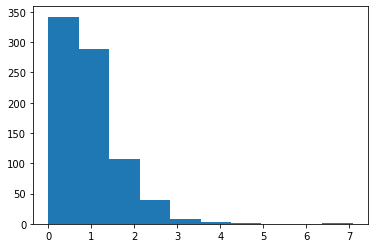

In [52]:
plt.hist(errors_df["Abs_error"])

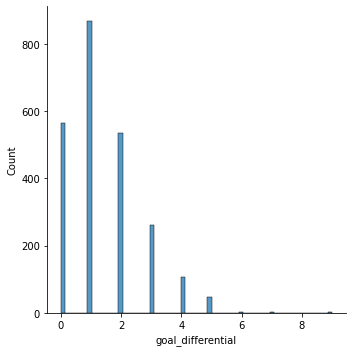

In [502]:
sns.displot(y)

In [53]:
possible_errors = list(set(errors_df["actual"]))
for i in possible_errors:
    ### seaborn plot here

# Playstyle analysis

In [140]:
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=5.0, approx_min_span_tree=True,
    gen_min_span_tree=False, leaf_size=40,
    metric='euclidean', min_cluster_size=4, min_samples=None, p=None)

In [141]:
clusterer.fit(agged_features[[x for x in agged_features.columns if x not in ["cleaned_year", "club_name"]]])

HDBSCAN(alpha=5.0, min_cluster_size=4)

In [142]:
hdbscan_labels = pd.DataFrame(
    {
        "hdbscan_labels":[str(x) for x in clusterer.labels_]}
)

In [147]:
agged_features["hdbscan_label"] = hdbscan_labels["hdbscan_labels"]

In [148]:
pca_featues = pd.DataFrame(PCA(n_components=2).fit_transform(
    agged_features[[x for x in agged_features.columns if x not in ["cleaned_year", "club_name", "hdbscan_labels"]]]
))

In [149]:
hdbscan_labels.shape

(217, 1)

<AxesSubplot:xlabel='0', ylabel='1'>

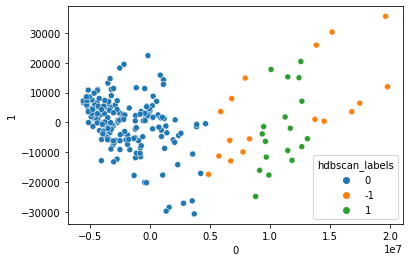

In [150]:
sns.scatterplot(x=pca_features[0], y=pca_features[1], hue=hdbscan_labels["hdbscan_labels"])

In [198]:
cluster_1 = pd.DataFrame(
    agged_features[agged_features["hdbscan_label"]=="1"].mean(
    )[[x for x in top_features.index]], columns=["hdbscan_cluster_1"]
)
cluster_noise= pd.DataFrame(
    agged_features[agged_features["hdbscan_label"]=="-1"].mean(
    )[[x for x in top_features.index]], columns=["hdbscan_cluster_noise"]
)
cluster_0 = pd.DataFrame(
    agged_features[agged_features["hdbscan_label"]=="0"].mean(
    )[[x for x in top_features.index]], columns=["hdbscan_cluster_0"]
)
afc_richmond = pd.DataFrame(
    agged_features[(
        (agged_features["club_name"]=="AFC Richmond")
        & (agged_features["cleaned_year"]==2021)
    )].mean(
    )[[x for x in top_features.index]], columns=["AFC Richmond 2021"]
)
cluster_playstyles = pd.concat(
    [
        cluster_1,
        cluster_0,
        cluster_noise,
        afc_richmond
    ], axis=1
)

/var/folders/d2/gdnhvq7d0bv50htf93v0wtcm0000gn/T/ipykernel_26967/1901609912.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  agged_features[agged_features["hdbscan_label"]=="1"].mean(
/var/folders/d2/gdnhvq7d0bv50htf93v0wtcm0000gn/T/ipykernel_26967/1901609912.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  agged_features[agged_features["hdbscan_label"]=="-1"].mean(
/var/folders/d2/gdnhvq7d0bv50htf93v0wtcm0000gn/T/ipykernel_26967/1901609912.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the

In [200]:
cluster_playstyles

,hdbscan_cluster_1,hdbscan_cluster_0,hdbscan_cluster_noise,AFC Richmond 2021
lf,65.204975,58.604712,64.597012,58.515152
rf,65.204975,58.604712,64.597012,58.515152
cf,65.204975,58.604712,64.597012,58.515152
pace,73.026525,68.940515,73.149476,61.600000
skill_dribbling,66.006108,59.175813,65.745333,57.878788
rb,62.138426,56.256641,61.772115,58.272727
lb,62.138426,56.256641,61.772115,58.272727
skill_long_passing,63.594797,55.847070,63.484056,57.333333
lw,65.235147,58.844392,64.735387,58.030303
rw,65.235147,58.844392,64.735387,58.030303


In [175]:
win_rate_clusters = agged_features.merge(win_summary, left_on="club_name", right_on="team")
win_rate_clusters = win_rate_clusters[win_rate_clusters["cleaned_year"] == win_rate_clusters["year"]]

In [179]:
win_rate_clusters.groupby("hdbscan_label").mean()[["wins", "losses", "draws"]]

,wins,losses,draws
hdbscan_label,,,
-1,20.823529,7.588235,7.823529
0,8.756098,12.650407,7.024390
1,21.833333,7.722222,7.500000


In [507]:
win_rate_clusters[(win_rate_clusters["year"]==2021) & (win_rate_clusters["hdbscan_label"]=="0")]

,club_name,cleaned_year,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,pace,...,hdbscan_label,year,team,wins,draws,losses,goals_scored_home,goals_scored_away,goals_scored_against_home,goals_scored_against_away
48,AFC Richmond,2021,71.454545,75.242424,5.264697e+06,34272.727273,1.545455,2.909091,2.606061,61.600000,...,0,2021,AFC Richmond,10,10.0,13,20,16,21,20
132,Aston Villa,2021,70.969697,76.454545,5.673636e+06,34575.757576,1.212121,2.939394,2.545455,69.214286,...,0,2021,Aston Villa,11,6.0,18,23,18,24,23
181,Brentford,2021,66.533333,75.200000,2.545333e+06,16733.333333,1.000000,2.866667,2.666667,70.481481,...,0,2021,Brentford,3,3.0,5,7,6,9,7
216,Brighton & Hove Albion,2021,70.787879,77.333333,5.399242e+06,32363.636364,1.242424,3.212121,2.545455,67.586207,...,0,2021,Brighton & Hove Albion,11,12.0,10,21,13,18,21
258,Burnley,2021,70.166667,75.066667,5.014333e+06,30866.666667,1.100000,3.100000,2.400000,64.074074,...,0,2021,Burnley,7,10.0,17,14,21,25,14
370,Everton,2021,74.393939,79.545455,9.726515e+06,56727.272727,1.606061,3.090909,2.878788,68.833333,...,0,2021,Everton,12,9.0,13,19,18,25,19
398,Fulham,2021,69.939394,75.787879,4.505303e+06,48969.696970,1.151515,3.121212,2.606061,71.266667,...,0,2021,Fulham,3,8.0,12,3,11,16,3
447,Leeds United,2021,67.969697,75.909091,3.087879e+06,36742.424242,1.121212,2.757576,2.636364,71.266667,...,0,2021,Leeds United,13,8.0,12,21,22,17,21
496,Leicester City,2021,75.151515,78.545455,1.046273e+07,60030.303030,1.484848,3.272727,2.757576,67.933333,...,0,2021,Leicester City,15,7.0,11,30,25,25,30
706,Newcastle United,2021,73.272727,77.333333,6.954545e+06,30090.909091,1.212121,3.090909,2.606061,69.266667,...,0,2021,Newcastle United,7,10.0,17,24,17,33,24


# Recommendations

#### we have 80M Euros

In [208]:
euros = 80000000

In [203]:
# what stats should we focus on?

cluster_playstyles["diff_from_top_teams"] \
    = (cluster_playstyles["hdbscan_cluster_1"] 
       - cluster_playstyles["AFC Richmond 2021"])/cluster_playstyles["AFC Richmond 2021"]

In [205]:
cluster_playstyles.sort_values("diff_from_top_teams", ascending=False)

,hdbscan_cluster_1,hdbscan_cluster_0,hdbscan_cluster_noise,AFC Richmond 2021,diff_from_top_teams
pace,73.026525,68.940515,73.149476,61.600000,0.185496
skill_dribbling,66.006108,59.175813,65.745333,57.878788,0.140420
lw,65.235147,58.844392,64.735387,58.030303,0.124157
rw,65.235147,58.844392,64.735387,58.030303,0.124157
lf,65.204975,58.604712,64.597012,58.515152,0.114326
rf,65.204975,58.604712,64.597012,58.515152,0.114326
cf,65.204975,58.604712,64.597012,58.515152,0.114326
skill_long_passing,63.594797,55.847070,63.484056,57.333333,0.109212
rb,62.138426,56.256641,61.772115,58.272727,0.066338
lb,62.138426,56.256641,61.772115,58.272727,0.066338


In [517]:
summary_cols = ["long_name", "short_name", "wage_eur", "release_clause_eur", "club_name"]\
    + [x for x in top_features.index][:3]

top_players_total = df_first_sheet[
    (
        (df_first_sheet["cleaned_year"]==2020)
        & (df_first_sheet["release_clause_eur"])
    )
    
].sort_values(
    [x for x in top_features.index][:3], 
    ascending=False
).head(10)[summary_cols]

top_35_player_targets = df_first_sheet[
    (
        (df_first_sheet["cleaned_year"]==2020)
        & (df_first_sheet["release_clause_eur"]<=euros)
    )
    
].sort_values(
    [x for x in top_features.index][:3], 
    ascending=False
).head(35)[summary_cols]

top_35_player_targets["remaining_euros"] = euros - top_35_player_targets["release_clause_eur"]
top_35_player_targets['remaining_euros'] = top_35_player_targets['remaining_euros'].apply(
    lambda x: "${:.1f}k".format((x/1000)
                               ))
top_35_player_targets["top_3_stats_avg"] = top_35_player_targets.apply(
    lambda x: (x["lf"] + x["rf"] + x["cf"])/3, axis=1
)


In [519]:
top_35_player_targets

,long_name,short_name,wage_eur,release_clause_eur,club_name,lf,rf,cf,remaining_euros,top_3_stats_avg
224,Dries Mertens,D. Mertens,130000,68000000.0,Napoli,86,86,86,$12000.0k,86.0
478,Gareth Frank Bale,G. Bale,250000,76900000.0,Real Madrid,84,84,84,$3100.0k,84.0
677,Josip Iličić,J. Iličić,90000,47600000.0,Atalanta,84,84,84,$32400.0k,84.0
1005,Wissam Ben Yedder,W. Ben Yedder,70000,51300000.0,AS Monaco,84,84,84,$28700.0k,84.0
136,David Josué Jiménez Silva,David Silva,275000,66600000.0,Manchester City,83,83,83,$13400.0k,83.0
320,Ángel Fabián Di María Hernández,A. Di María,150000,72200000.0,Paris Saint-Germain,83,83,83,$7800.0k,83.0
324,Thomas Müller,T. Müller,170000,71800000.0,FC Bayern München,83,83,83,$8200.0k,83.0
479,Marcelo Vieira da Silva Júnior,Marcelo,200000,57400000.0,Real Madrid,83,83,83,$22600.0k,83.0
482,Iago Aspas Juncal,Iago Aspas,50000,72500000.0,RC Celta,83,83,83,$7500.0k,83.0
637,Bamidele Alli,D. Alli,110000,79900000.0,Tottenham Hotspur,83,83,83,$100.0k,83.0


In [520]:
top_players_total

,long_name,short_name,wage_eur,release_clause_eur,club_name,lf,rf,cf
0,Lionel Andrés Messi Cuccittini,L. Messi,575000,195800000.0,FC Barcelona,93,93,93
7,Cristiano Ronaldo dos Santos Aveiro,Cristiano Ronaldo,400000,96500000.0,Juventus,91,91,91
13,Neymar da Silva Santos Júnior,Neymar Jr,300000,195200000.0,Paris Saint-Germain,90,90,90
27,Eden Hazard,E. Hazard,475000,184500000.0,Real Madrid,89,89,89
45,Mohamed Salah Ghaly,M. Salah,225000,148900000.0,Liverpool,88,88,88
74,Kylian Mbappé Lottin,K. Mbappé,150000,191700000.0,Paris Saint-Germain,88,88,88
81,Sergio Leonel Agüero del Castillo,S. Agüero,300000,111000000.0,Manchester City,88,88,88
28,Kevin De Bruyne,K. De Bruyne,375000,166500000.0,Manchester City,87,87,87
86,Antoine Griezmann,A. Griezmann,375000,141500000.0,FC Barcelona,87,87,87
142,Sadio Mané,S. Mané,225000,114700000.0,Liverpool,87,87,87


In [521]:
top_35_player_targets.sort_values(["top_3_stats_avg"], ascending=False)

,long_name,short_name,wage_eur,release_clause_eur,club_name,lf,rf,cf,remaining_euros,top_3_stats_avg
224,Dries Mertens,D. Mertens,130000,68000000.0,Napoli,86,86,86,$12000.0k,86.0
677,Josip Iličić,J. Iličić,90000,47600000.0,Atalanta,84,84,84,$32400.0k,84.0
1005,Wissam Ben Yedder,W. Ben Yedder,70000,51300000.0,AS Monaco,84,84,84,$28700.0k,84.0
478,Gareth Frank Bale,G. Bale,250000,76900000.0,Real Madrid,84,84,84,$3100.0k,84.0
637,Bamidele Alli,D. Alli,110000,79900000.0,Tottenham Hotspur,83,83,83,$100.0k,83.0
1421,José Luis Morales Nogales,Morales,40000,42000000.0,Levante UD,83,83,83,$38000.0k,83.0
1351,Ángel Martín Correa,A. Correa,60000,61600000.0,Atlético Madrid,83,83,83,$18400.0k,83.0
984,Carlos Alberto Vela Garrido,C. Vela,15000,36800000.0,Los Angeles FC,83,83,83,$43200.0k,83.0
640,Memphis Depay,M. Depay,110000,80000000.0,Olympique Lyonnais,83,83,83,$0.0k,83.0
1337,Gabriel Fernando de Jesus,Gabriel Jesus,140000,63600000.0,Manchester City,83,83,83,$16400.0k,83.0


In [553]:
def add_players_to_2021_roster_increase_dribbling(
    players_received, 
    players_traded_away, 
    dribbling_skill_increase_pct
):
    afc_players_2021 = df_first_sheet[(
            (df_first_sheet["club_name"]=="AFC Richmond")
        & (df_first_sheet["cleaned_year"]==2021)
    )]
    
    agged_afc_roster_without_players = pd.DataFrame(
        afc_players_2021[[x for x in afc_players_2021.columns if x not in ["club_name", "cleaned_year"]]].mean()
        , columns = ["AFC before trade"]
    )
    
    players_to_add = df_first_sheet[
        (df_first_sheet["long_name"].isin(players_received))
        & (df_first_sheet["cleaned_year"]==2021)
    ][[x for x in df_first_sheet if x not in feature_exclusion_list]]
    
    afc_players_2021 = afc_players_2021.append(players_to_add, ignore_index=True)
    afc_players_2021["skill_dribbling"] = afc_players_2021["skill_dribbling"].apply(
        lambda x: x*(1.0 + dribbling_skill_increase_pct)
    )
    afc_players_2021 = afc_players_2021[~(afc_players_2021["long_name"].isin(players_traded_away))]
    
    agged_afc_roster_with_players = pd.DataFrame(
        afc_players_2021[[x for x in afc_players_2021.columns if x not in ["club_name", "cleaned_year"]]].mean()
        , columns = ["AFC after trade"]
    )
    
    summary = pd.concat([agged_afc_roster_with_players, agged_afc_roster_without_players], axis=1)
    return summary.transpose()

def compare_summary_to_competition(competing_clubs, year, afc_richmond_with_player):
    competing_clubs = valid_features[(
            (valid_features["club_name"].isin(competing_clubs))
        & (valid_features["cleaned_year"]==year)
    )][[x for x in df_first_sheet if x not in feature_exclusion_list]]
    competing_club_summary = competing_clubs.groupby("club_name").mean(
        )
    competing_club_summary = pd.concat(
        [afc_richmond_with_player.rename_axis("club_name"), competing_club_summary.rename_axis("club_name")]
    )
    competing_club_summary = competing_club_summary[[x for x in top_features.index]].sort_values(
        [x for x in top_features.index], ascending=False
    )
    return competing_club_summary

In [554]:
afc_with_mertens = add_players_to_2021_roster_increase_dribbling(
    players_received=["Dries Mertens"], 
    players_traded_away=[], 
    dribbling_skill_increase_pct=0.)

/var/folders/d2/gdnhvq7d0bv50htf93v0wtcm0000gn/T/ipykernel_26967/3873789818.py:12: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  afc_players_2021[[x for x in afc_players_2021.columns if x not in ["club_name", "cleaned_year"]]].mean()
/var/folders/d2/gdnhvq7d0bv50htf93v0wtcm0000gn/T/ipykernel_26967/3873789818.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  afc_players_2021[[x for x in afc_players_2021.columns if x not in ["club_name", "cleaned_year"]]].mean()
/var/folders/d2/gdnhvq7d0bv50htf93v0wtcm0000gn/T/ipykernel_26967/3873789818.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  afc_players_2021 = afc_players_2021.append(p

In [555]:
afc_with_mertens[[x for x in top_features.index]]

,lf,rf,cf,pace,skill_dribbling,rb,lb,skill_long_passing,lw,rw
AFC after trade,59.264706,59.264706,59.264706,62.387097,58.764706,58.323529,58.323529,57.823529,58.823529,58.823529
AFC before trade,58.515152,58.515152,58.515152,61.600000,57.878788,58.272727,58.272727,57.333333,58.030303,58.030303


In [556]:
compare_summary_to_competition(["Brighton & Hove Albion", "Wolverhampton Wanderers"], 2021, afc_with_mertens)

,lf,rf,cf,pace,skill_dribbling,rb,lb,skill_long_passing,lw,rw
club_name,,,,,,,,,,
Brighton & Hove Albion,60.060606,60.060606,60.060606,67.586207,61.212121,57.333333,57.333333,60.515152,60.060606,60.060606
Wolverhampton Wanderers,60.030303,60.030303,60.030303,68.000000,62.030303,58.939394,58.939394,60.454545,60.303030,60.303030
AFC after trade,59.264706,59.264706,59.264706,62.387097,58.764706,58.323529,58.323529,57.823529,58.823529,58.823529
AFC before trade,58.515152,58.515152,58.515152,61.600000,57.878788,58.272727,58.272727,57.333333,58.030303,58.030303


In [557]:
add_players_to_2021_roster_increase_passing = add_players_to_2021_roster_increase_dribbling(
    players_received=["Dries Mertens"], 
    players_traded_away=[], 
    dribbling_skill_increase_pct=0.05)

/var/folders/d2/gdnhvq7d0bv50htf93v0wtcm0000gn/T/ipykernel_26967/3873789818.py:12: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  afc_players_2021[[x for x in afc_players_2021.columns if x not in ["club_name", "cleaned_year"]]].mean()
/var/folders/d2/gdnhvq7d0bv50htf93v0wtcm0000gn/T/ipykernel_26967/3873789818.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  afc_players_2021[[x for x in afc_players_2021.columns if x not in ["club_name", "cleaned_year"]]].mean()
/var/folders/d2/gdnhvq7d0bv50htf93v0wtcm0000gn/T/ipykernel_26967/3873789818.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  afc_players_2021 = afc_players_2021.append(p

In [562]:
compare_summary_to_competition(
    ["Brighton & Hove Albion", "Wolverhampton Wanderers"], 
    2021, 
    add_players_to_2021_roster_increase_passing
)

,lf,rf,cf,pace,skill_dribbling,rb,lb,skill_long_passing,lw,rw
club_name,,,,,,,,,,
Brighton & Hove Albion,60.060606,60.060606,60.060606,67.586207,61.212121,57.333333,57.333333,60.515152,60.060606,60.060606
Wolverhampton Wanderers,60.030303,60.030303,60.030303,68.000000,62.030303,58.939394,58.939394,60.454545,60.303030,60.303030
AFC after trade,59.264706,59.264706,59.264706,62.387097,61.702941,58.323529,58.323529,57.823529,58.823529,58.823529
AFC before trade,58.515152,58.515152,58.515152,61.600000,57.878788,58.272727,58.272727,57.333333,58.030303,58.030303


In [563]:
df_first_sheet[(
            (df_first_sheet["club_name"].isin(["AFC Richmond"]))
        & (df_first_sheet["cleaned_year"]==2021)
    )].sort_values("skill_long_passing")[
    ["club_name", "release_clause_eur", "long_name", "skill_long_passing"]
].head(10)

,club_name,release_clause_eur,long_name,skill_long_passing
115188,AFC Richmond,303000.0,Nikola Tavares,28
110357,AFC Richmond,404000.0,Sam Woods,29
2531,AFC Richmond,15200000.0,Vicente Guaita Panadero,33
63543,AFC Richmond,618000.0,Stephen Henderson,34
4558,AFC Richmond,NaN,Michy Batshuayi Tunga,36
10393,AFC Richmond,6800000.0,Wayne Hennessey,41
70718,AFC Richmond,988000.0,Ryan Inniss,44
99834,AFC Richmond,821000.0,Brandon Leroy Pierrick Keutcha,47
70143,AFC Richmond,2000000.0,Tyrick Mitchell,48
20902,AFC Richmond,5900000.0,Christian Benteke Liolo,48


In [565]:
long_passers_cheap = df_first_sheet[
    (df_first_sheet["release_clause_eur"] < 303000 + 404000.0)
    & (df_first_sheet["cleaned_year"]==2021)
].sort_values("skill_long_passing", ascending=False).head(10)

In [566]:
long_passers_cheap[["club_name", "release_clause_eur", "long_name", "skill_long_passing"]]

,club_name,release_clause_eur,long_name,skill_long_passing
104238,CE Sabadell FC,202000.0,Katio Landi,78
36137,Toronto FC,600000.0,Laurent Ciman,76
104034,MKE Ankaragücü,440000.0,Ender Aygören,75
78334,UD Logroñés,543000.0,Damián Ezequiel Petcoff Kailer,75
95462,Alanyaspor,519000.0,Hasan Ayaroğlu,74
95290,CD Mirandés,525000.0,Juan De La Mata Rodao,74
49264,Cusco FC,699000.0,Lorenzo Eduardo Aranda,73
48952,Bristol City,618000.0,Chris Brunt,73
36120,FC Dallas,600000.0,Reto Ziegler,72
107433,Gazişehir Gaziantep F.K.,499000.0,Hasan Yurtseven,72


In [571]:
afc_with_mertens_and_passers = add_players_to_2021_roster_increase_dribbling(
    ["Dries Mertens","Katio Landi", "Laurent Ciman"]
    , ["Sam Woods", "Nikola Tavares"]
    , 0.05
)

/var/folders/d2/gdnhvq7d0bv50htf93v0wtcm0000gn/T/ipykernel_26967/3873789818.py:12: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  afc_players_2021[[x for x in afc_players_2021.columns if x not in ["club_name", "cleaned_year"]]].mean()
/var/folders/d2/gdnhvq7d0bv50htf93v0wtcm0000gn/T/ipykernel_26967/3873789818.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  afc_players_2021[[x for x in afc_players_2021.columns if x not in ["club_name", "cleaned_year"]]].mean()
/var/folders/d2/gdnhvq7d0bv50htf93v0wtcm0000gn/T/ipykernel_26967/3873789818.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  afc_players_2021 = afc_players_2021.append(p

In [572]:
compare_summary_to_competition(
    ["Brighton & Hove Albion", "Wolverhampton Wanderers", "Aston Villa"], 
    2021, 
    afc_with_mertens_and_passers
)

,lf,rf,cf,pace,skill_dribbling,rb,lb,skill_long_passing,lw,rw
club_name,,,,,,,,,,
AFC after trade,60.617647,60.617647,60.617647,63.161290,63.277941,58.911765,58.911765,60.676471,60.176471,60.176471
Brighton & Hove Albion,60.060606,60.060606,60.060606,67.586207,61.212121,57.333333,57.333333,60.515152,60.060606,60.060606
Wolverhampton Wanderers,60.030303,60.030303,60.030303,68.000000,62.030303,58.939394,58.939394,60.454545,60.303030,60.303030
Aston Villa,59.515152,59.515152,59.515152,69.214286,58.666667,55.848485,55.848485,58.545455,59.303030,59.303030
AFC before trade,58.515152,58.515152,58.515152,61.600000,57.878788,58.272727,58.272727,57.333333,58.030303,58.030303
